11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
750/750 [==============================] - 15s 6ms/step - loss: 0.2041 - accuracy: 0.9367 - val_loss: 0.0826 - val_accuracy: 0.9746
Epoch 2/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0562 - accuracy: 0.9823 - val_loss: 0.0621 - val_accuracy: 0.9827
Epoch 3/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0406 - accuracy: 0.9873 - val_loss: 0.0450 - val_accuracy: 0.9866
Epoch 4/5
750/750 [==============================] - 4s 6ms/step - loss: 0.0306 - accuracy: 0.9900 - val_loss: 0.0417 - val_accuracy: 0.9883
Epoch 5/5
1/1 [==============================] - 0s 167ms/step


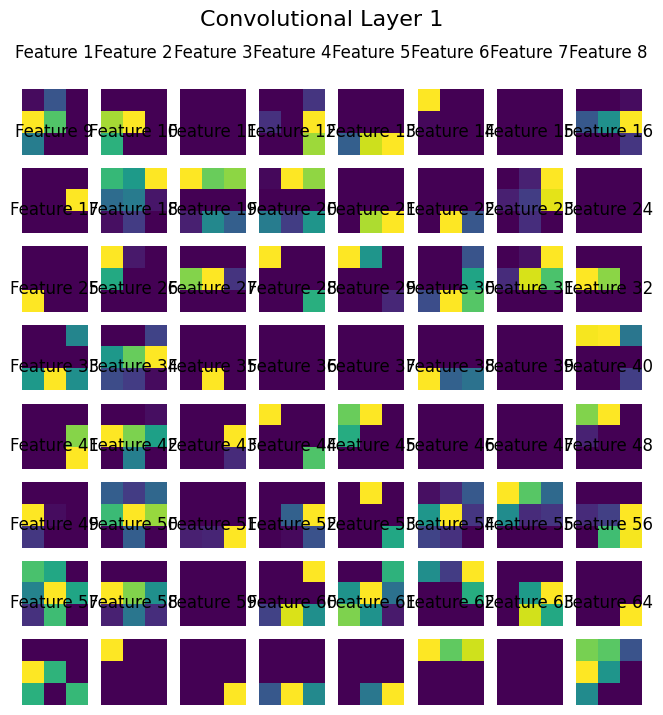

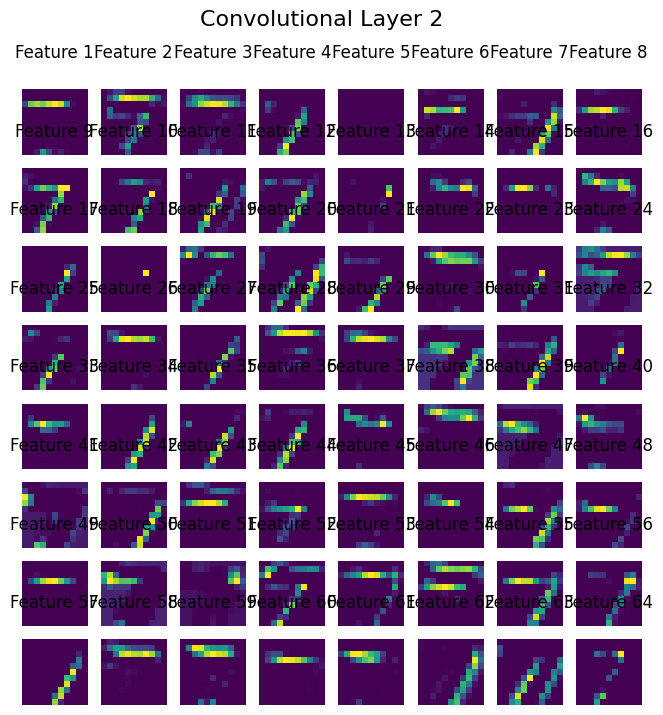

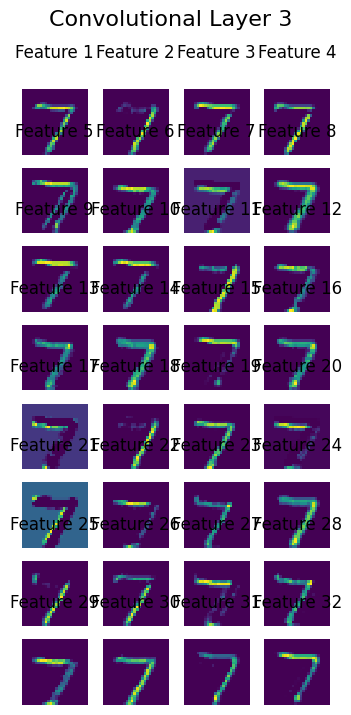

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Create the CNN model
input_layer = Input(shape=(28, 28, 1))
conv1 = Conv2D(32, (3, 3), activation='relu')(input_layer)
pool1 = MaxPooling2D((2, 2))(conv1)
conv2 = Conv2D(64, (3, 3), activation='relu')(pool1)
pool2 = MaxPooling2D((2, 2))(conv2)
conv3 = Conv2D(64, (3, 3), activation='relu')(pool2)
flatten = Flatten()(conv3)
dense1 = Dense(64, activation='relu')(flatten)
output_layer = Dense(10, activation='softmax')(dense1)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Choose a sample input from the test set
sample_index = 0
sample_input = x_test[sample_index]

# Define a new model to visualize intermediate layers
visualization_model = Model(inputs=model.input, outputs=[conv1, conv2, conv3])

# Get the activations for the sample input
activations = visualization_model.predict(np.expand_dims(sample_input, axis=0))

# Visualize the feature maps learned by the convolutional layers
layer_names = ['Convolutional Layer 1', 'Convolutional Layer 2', 'Convolutional Layer 3']
for i, layer_activation in enumerate(activations[::-1]):
    num_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    cols = num_features // 8
    rows = 8

    fig, axes = plt.subplots(rows, cols, figsize=(cols, rows))
    for j in range(rows):
        for k in range(cols):
            ax = axes[j, k]
            ax.matshow(layer_activation[0, :, :, j * cols + k], cmap='viridis')
            ax.axis('off')
            ax.set_title(f'Feature {j * cols + k + 1}')

    fig.suptitle(layer_names[i], fontsize=16)
    plt.show()


1/1 [==============================] - 0s 56ms/step


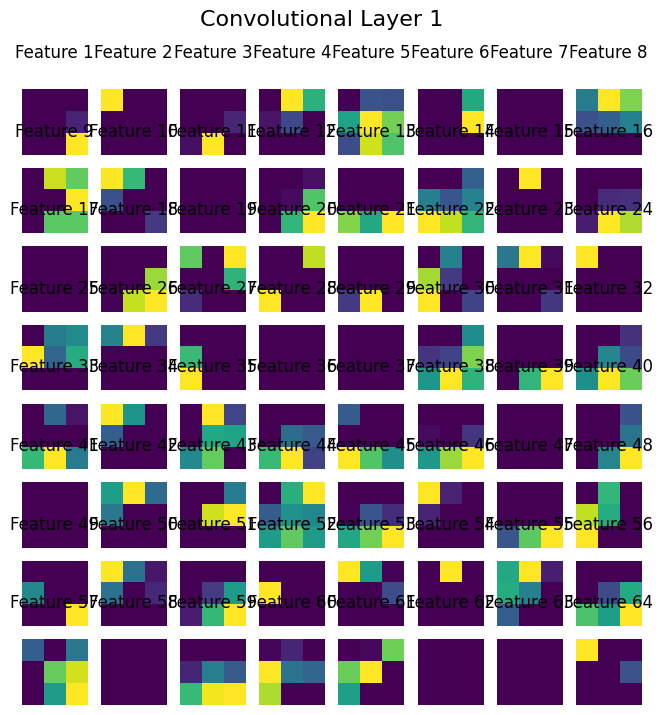

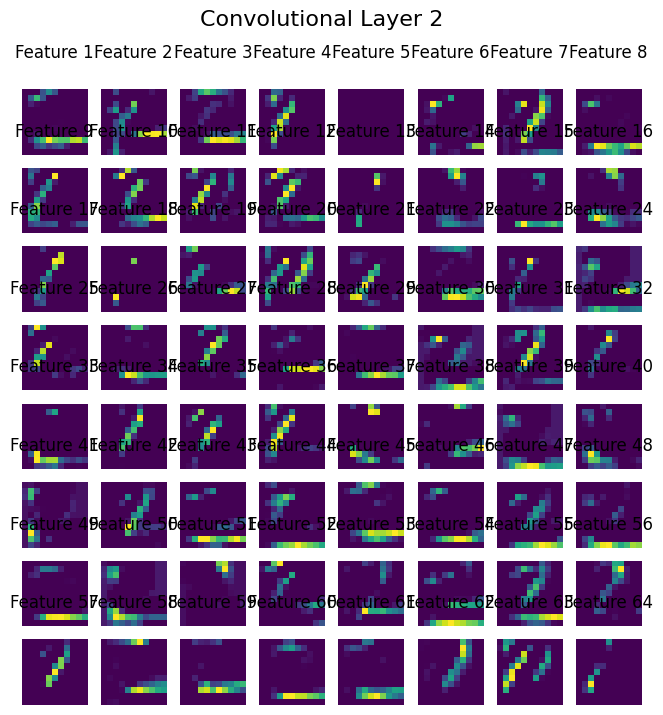

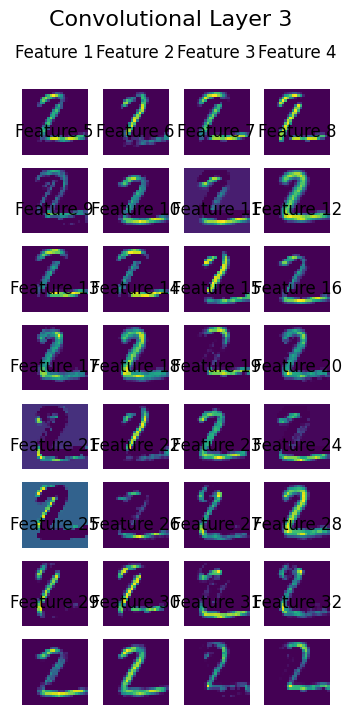

In [2]:
#MNIST: Layers Plot

sample_index = 1
sample_input = x_test[sample_index]

# Define a new model to visualize intermediate layers
visualization_model = Model(inputs=model.input, outputs=[conv1, conv2, conv3])

# Get the activations for the sample input
activations = visualization_model.predict(np.expand_dims(sample_input, axis=0))

# Visualize the feature maps learned by the convolutional layers
layer_names = ['Convolutional Layer 1', 'Convolutional Layer 2', 'Convolutional Layer 3']
for i, layer_activation in enumerate(activations[::-1]):
    num_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    cols = num_features // 8
    rows = 8

    fig, axes = plt.subplots(rows, cols, figsize=(cols, rows))
    for j in range(rows):
        for k in range(cols):
            ax = axes[j, k]
            ax.matshow(layer_activation[0, :, :, j * cols + k], cmap='viridis')
            ax.axis('off')
            ax.set_title(f'Feature {j * cols + k + 1}')

    fig.suptitle(layer_names[i], fontsize=16)
    plt.show()

170498071/170498071 [==============================] - 3s 0us/step
Epoch 1/50
625/625 [==============================] - 6s 6ms/step - loss: 1.6238 - accuracy: 0.4040 - val_loss: 1.2607 - val_accuracy: 0.5449
Epoch 2/50
625/625 [==============================] - 3s 5ms/step - loss: 1.1618 - accuracy: 0.5824 - val_loss: 1.0662 - val_accuracy: 0.6282
Epoch 3/50
625/625 [==============================] - 4s 6ms/step - loss: 0.9588 - accuracy: 0.6624 - val_loss: 0.9138 - val_accuracy: 0.6828
Epoch 4/50
625/625 [==============================] - 4s 6ms/step - loss: 0.8238 - accuracy: 0.7112 - val_loss: 0.8656 - val_accuracy: 0.7004
Epoch 5/50
625/625 [==============================] - 3s 6ms/step - loss: 0.7124 - accuracy: 0.7499 - val_loss: 0.8380 - val_accuracy: 0.7132
Epoch 6/50
625/625 [==============================] - 3s 5ms/step - loss: 0.6279 - accuracy: 0.7817 - val_loss: 0.7888 - val_accuracy: 0.7329
Epoch 7/50
625/625 [==============================] - 4s 6ms/step - loss: 0.5461 

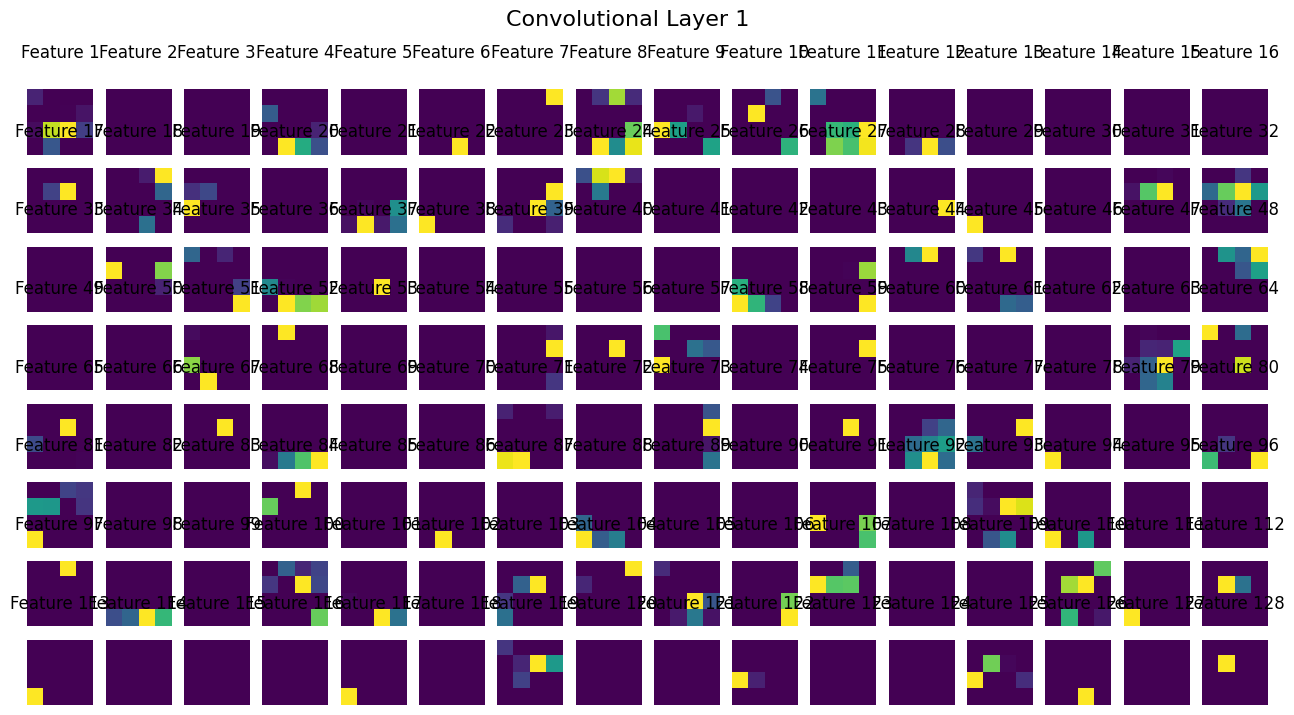

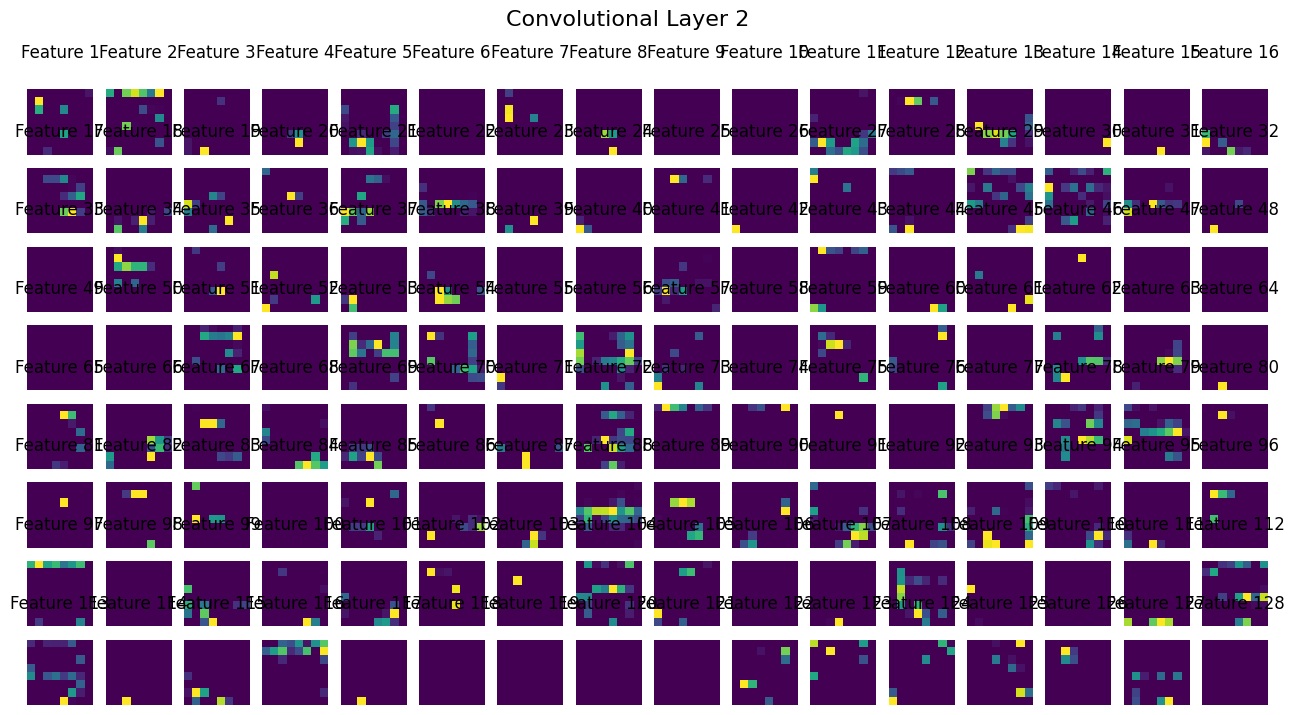

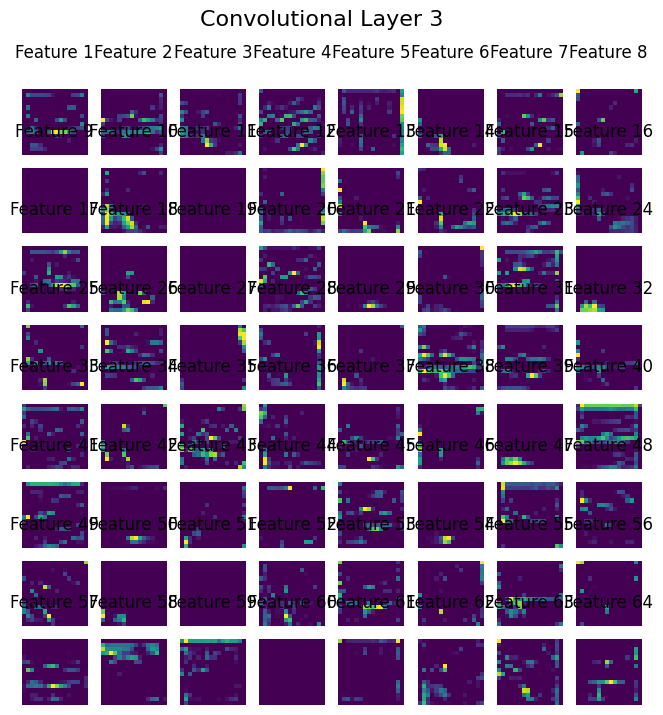

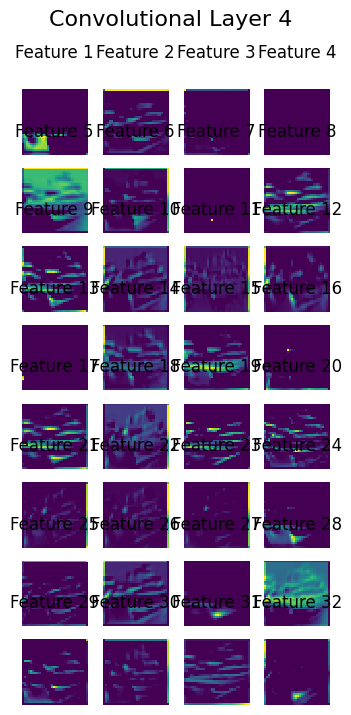

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Create the CNN model
input_layer = Input(shape=(32, 32, 3))
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
pool1 = MaxPooling2D((2, 2))(conv1)
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2))(conv2)
conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
pool3 = MaxPooling2D((2, 2))(conv3)
conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool3)
flatten = Flatten()(conv4)
dense1 = Dense(64, activation='relu')(flatten)
output_layer = Dense(10, activation='softmax')(dense1)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

# Choose a sample input from the test set
sample_index = 1
sample_input = x_test[sample_index]

# Define a new model to visualize intermediate layers
visualization_model = Model(inputs=model.input, outputs=[conv1, conv2, conv3, conv4])

# Get the activations for the sample input
activations = visualization_model.predict(np.expand_dims(sample_input, axis=0))

# Visualize the feature maps learned by the convolutional layers
layer_names = ['Convolutional Layer 1', 'Convolutional Layer 2', 'Convolutional Layer 3', 'Convolutional Layer 4']
for i, layer_activation in enumerate(activations[::-1]):
    num_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    cols = num_features // 8
    rows = 8

    fig, axes = plt.subplots(rows, cols, figsize=(cols, rows))
    for j in range(rows):
        for k in range(cols):
            ax = axes[j, k]
            ax.matshow(layer_activation[0, :, :, j * cols + k], cmap='viridis')
            ax.axis('off')
            ax.set_title(f'Feature {j * cols + k + 1}')

    fig.suptitle(layer_names[i], fontsize=16)
    plt.show()


1/1 [==============================] - 0s 103ms/step


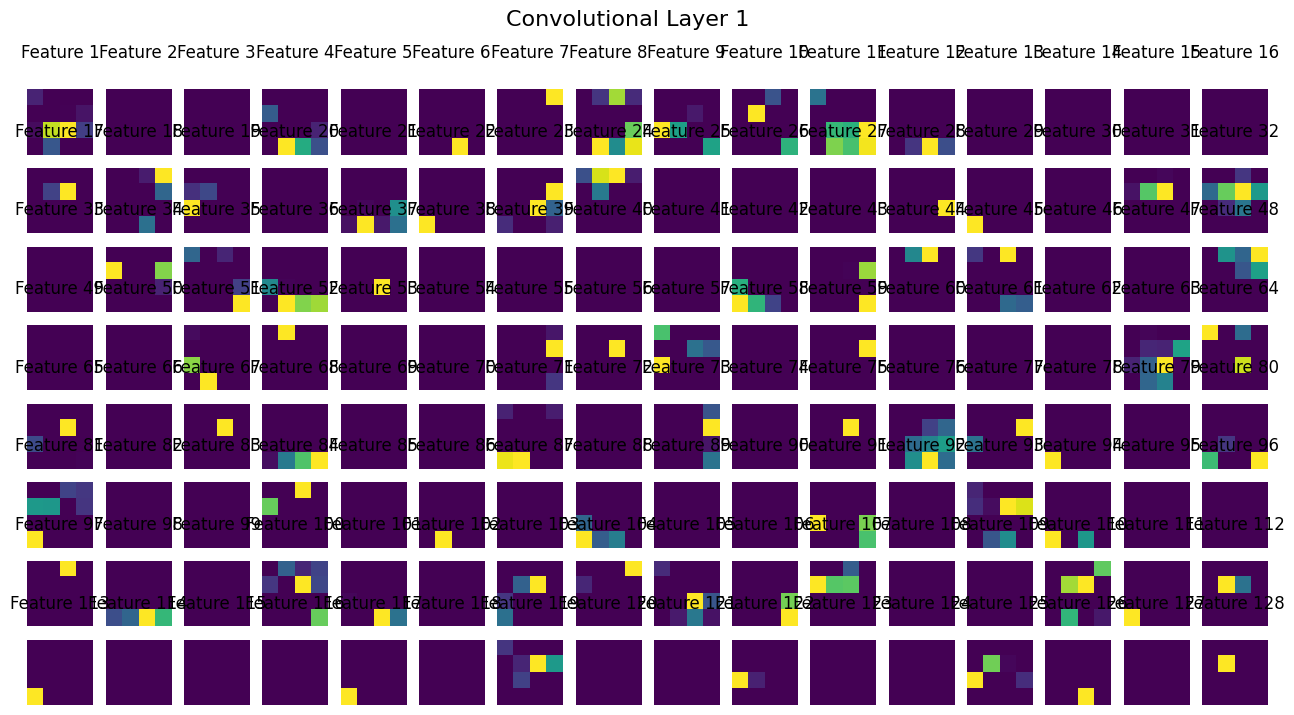

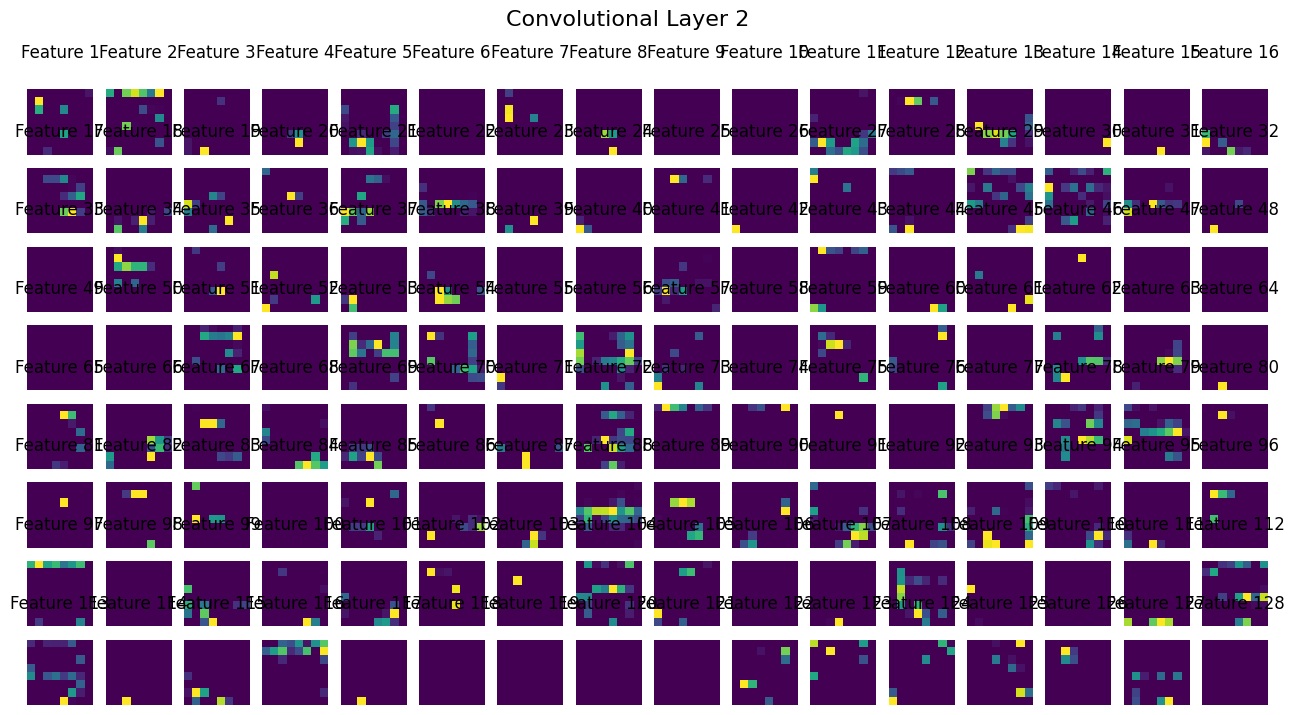

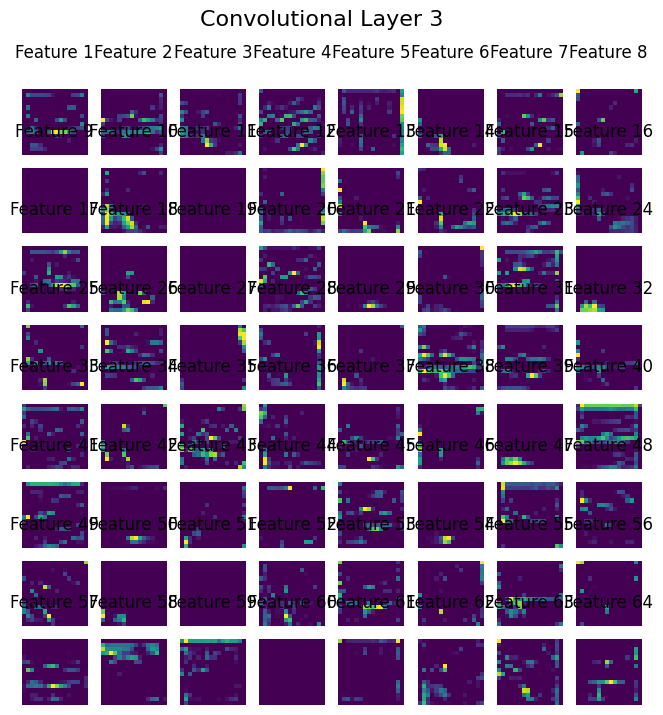

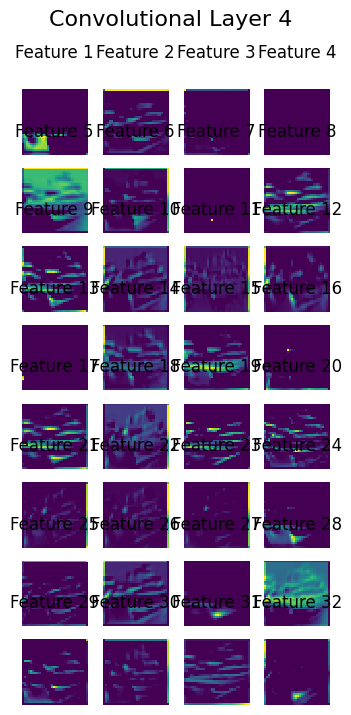

In [4]:
#CIFAR (Sparse) Layers Plot

# Choose a sample input from the test set
sample_index = 1
sample_input = x_test[sample_index]

# Define a new model to visualize intermediate layers
visualization_model = Model(inputs=model.input, outputs=[conv1, conv2, conv3, conv4])

# Get the activations for the sample input
activations = visualization_model.predict(np.expand_dims(sample_input, axis=0))

# Visualize the feature maps learned by the convolutional layers
layer_names = ['Convolutional Layer 1', 'Convolutional Layer 2', 'Convolutional Layer 3', 'Convolutional Layer 4']
for i, layer_activation in enumerate(activations[::-1]):
    num_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    cols = num_features // 8
    rows = 8

    fig, axes = plt.subplots(rows, cols, figsize=(cols, rows))
    for j in range(rows):
        for k in range(cols):
            ax = axes[j, k]
            ax.matshow(layer_activation[0, :, :, j * cols + k], cmap='viridis')
            ax.axis('off')
            ax.set_title(f'Feature {j * cols + k + 1}')

    fig.suptitle(layer_names[i], fontsize=16)
    plt.show()

In [5]:
y_test[1]

array([8], dtype=uint8)

Epoch 1/12
625/625 [==============================] - 6s 8ms/step - loss: 1.5628 - accuracy: 0.4261 - val_loss: 1.2310 - val_accuracy: 0.5557
Epoch 2/12
625/625 [==============================] - 4s 6ms/step - loss: 1.1011 - accuracy: 0.6100 - val_loss: 1.0085 - val_accuracy: 0.6376
Epoch 3/12
625/625 [==============================] - 4s 6ms/step - loss: 0.9061 - accuracy: 0.6808 - val_loss: 0.8677 - val_accuracy: 0.6969
Epoch 4/12
625/625 [==============================] - 3s 5ms/step - loss: 0.7627 - accuracy: 0.7309 - val_loss: 0.8410 - val_accuracy: 0.7084
Epoch 5/12
625/625 [==============================] - 5s 7ms/step - loss: 0.6545 - accuracy: 0.7703 - val_loss: 0.8064 - val_accuracy: 0.7250
Epoch 6/12
625/625 [==============================] - 3s 5ms/step - loss: 0.5574 - accuracy: 0.8026 - val_loss: 0.8183 - val_accuracy: 0.7272
Epoch 7/12
625/625 [==============================] - 4s 6ms/step - loss: 0.4776 - accuracy: 0.8318 - val_loss: 0.8039 - val_accuracy: 0.7398
Epoch 

1/1 [==============================] - 0s 106ms/step


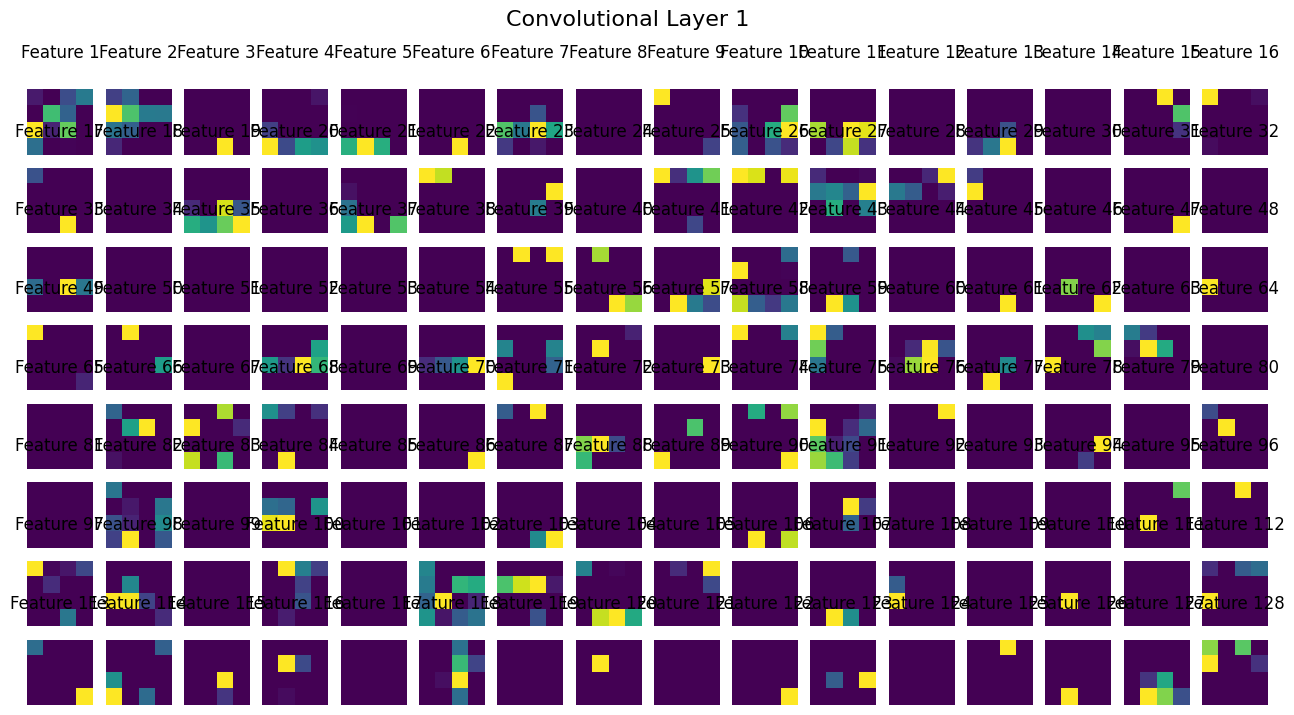

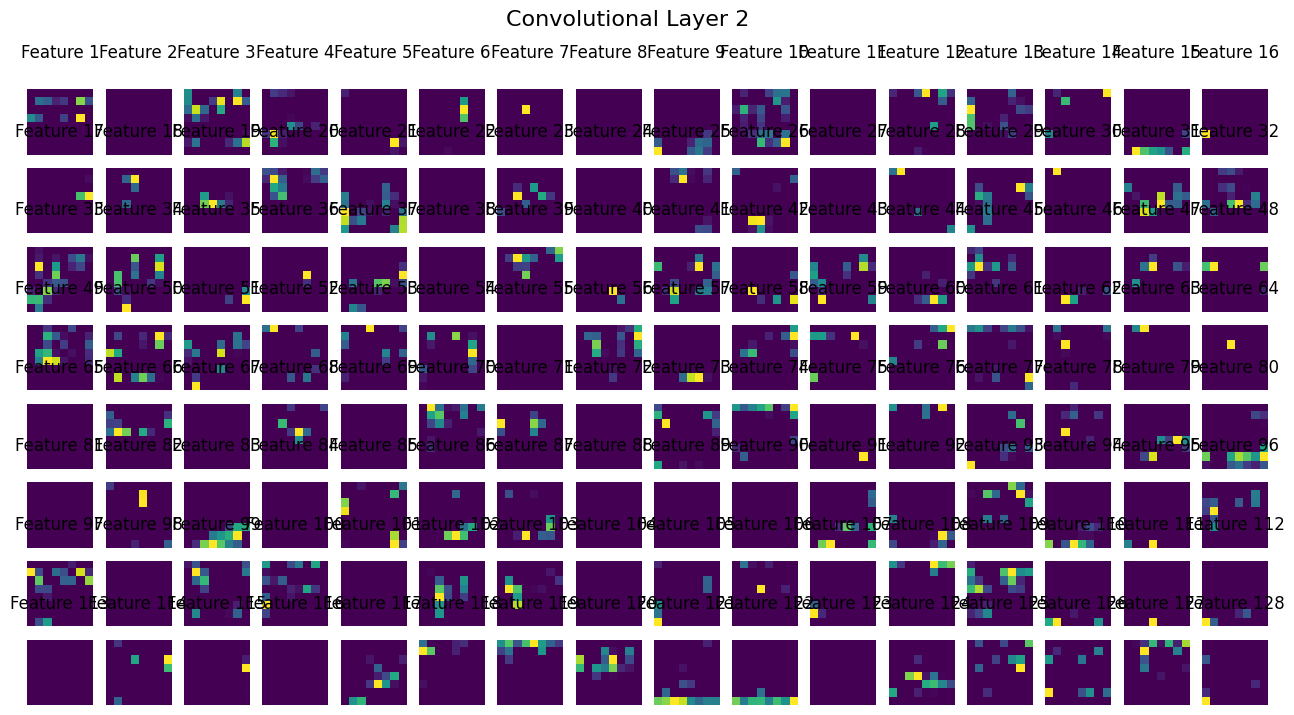

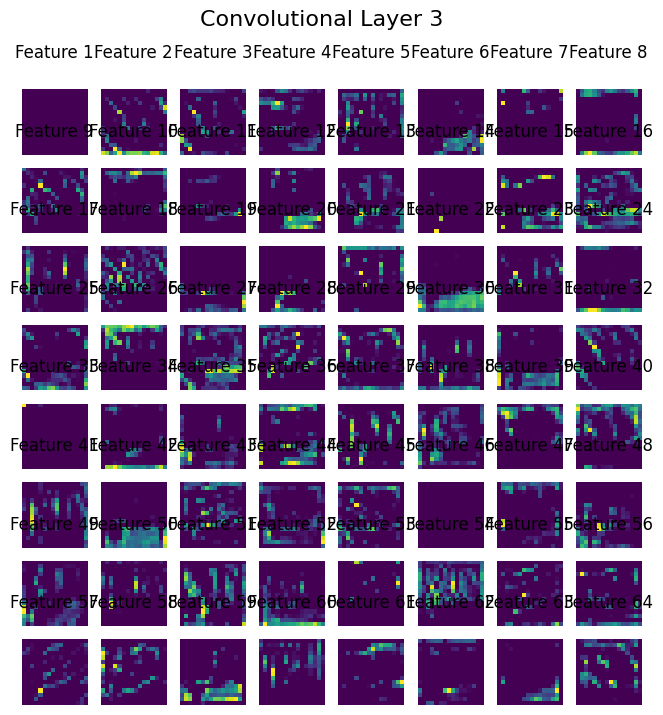

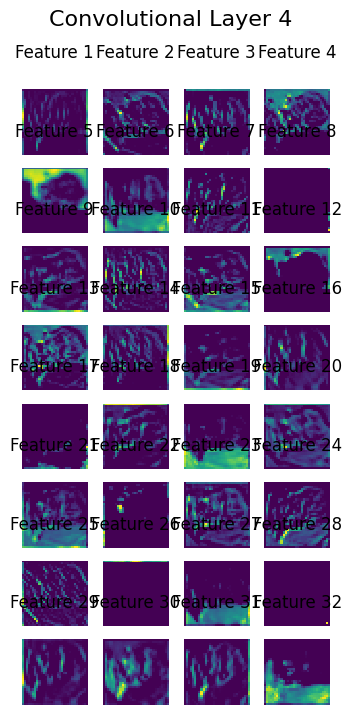

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoded vectors
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Create the CNN model
input_layer = Input(shape=(32, 32, 3))
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
pool1 = MaxPooling2D((2, 2))(conv1)
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2))(conv2)
conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
pool3 = MaxPooling2D((2, 2))(conv3)
conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool3)
flatten = Flatten()(conv4)
dense1 = Dense(64, activation='relu')(flatten)
output_layer = Dense(10, activation='softmax')(dense1)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=12, batch_size=64, validation_split=0.2)

# Choose a sample input from the test set
sample_index = 0
sample_input = x_test[sample_index]

# Define a new model to visualize intermediate layers
visualization_model = Model(inputs=model.input, outputs=[conv1, conv2, conv3, conv4])

# Get the activations for the sample input
activations = visualization_model.predict(np.expand_dims(sample_input, axis=0))

# Visualize the feature maps learned by the convolutional layers
layer_names = ['Convolutional Layer 1', 'Convolutional Layer 2', 'Convolutional Layer 3', 'Convolutional Layer 4']
for i, layer_activation in enumerate(activations[::-1]):
    num_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    cols = num_features // 8
    rows = 8

    fig, axes = plt.subplots(rows, cols, figsize=(cols, rows))
    for j in range(rows):
        for k in range(cols):
            ax = axes[j, k]
            ax.matshow(layer_activation[0, :, :, j * cols + k], cmap='viridis')
            ax.axis('off')
            ax.set_title(f'Feature {j * cols + k + 1}')

    fig.suptitle(layer_names[i], fontsize=16)
    plt.show()


1/1 [==============================] - 0s 192ms/step


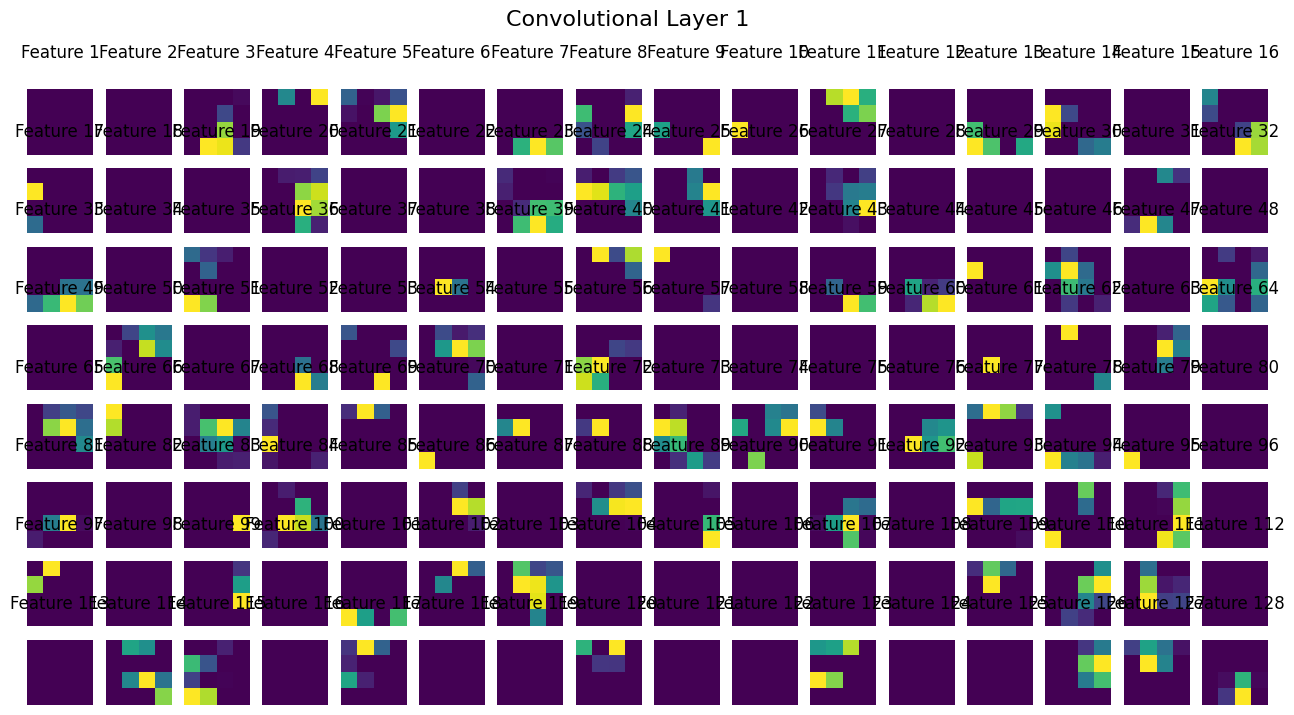

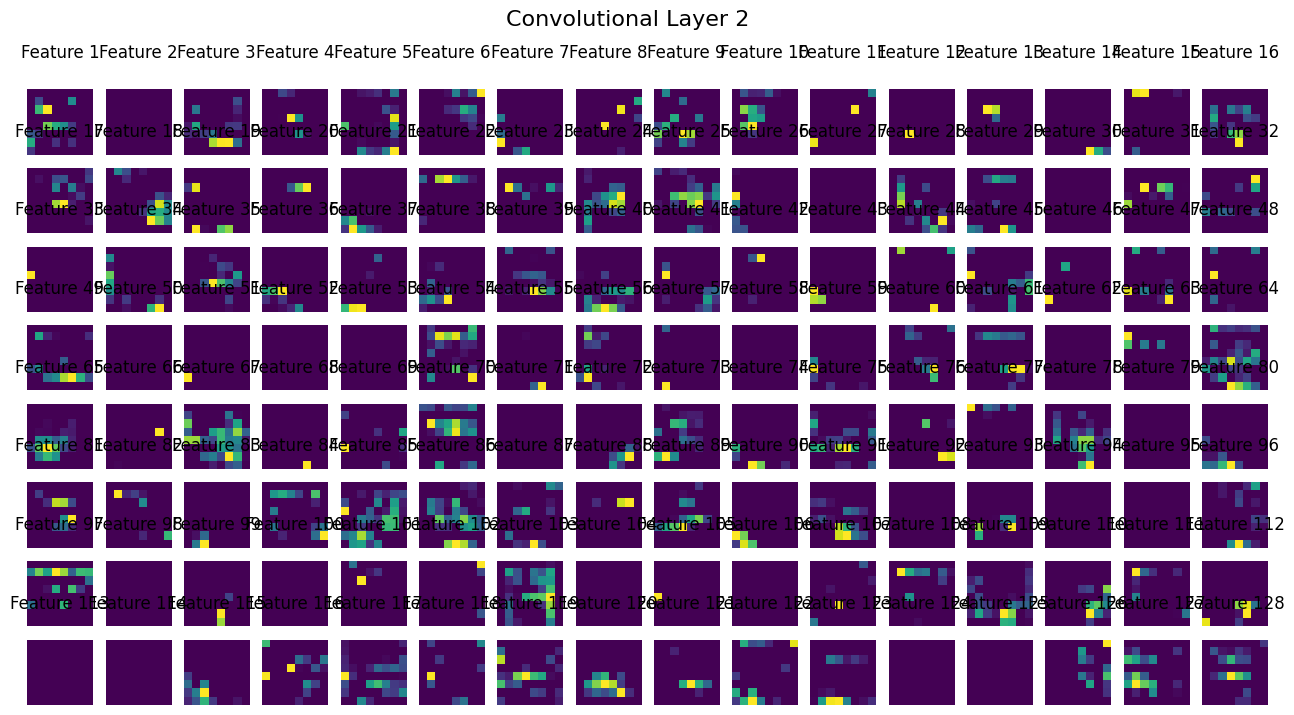

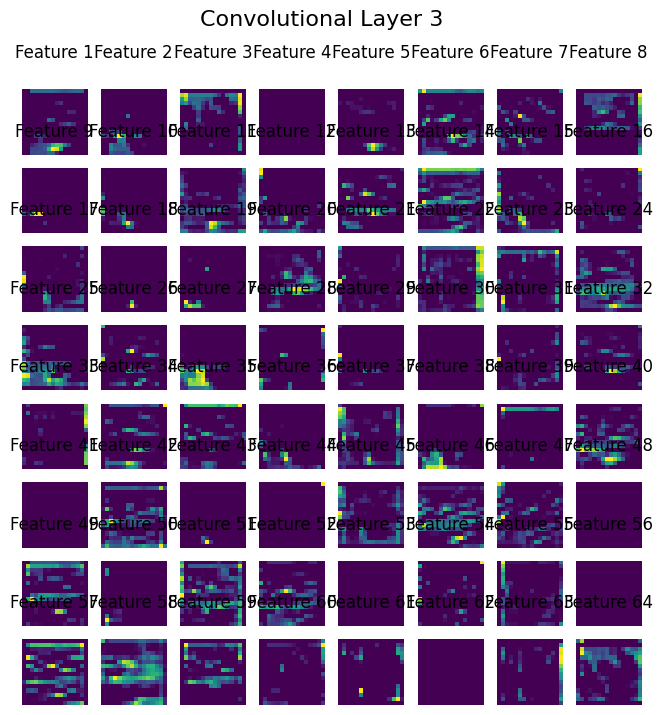

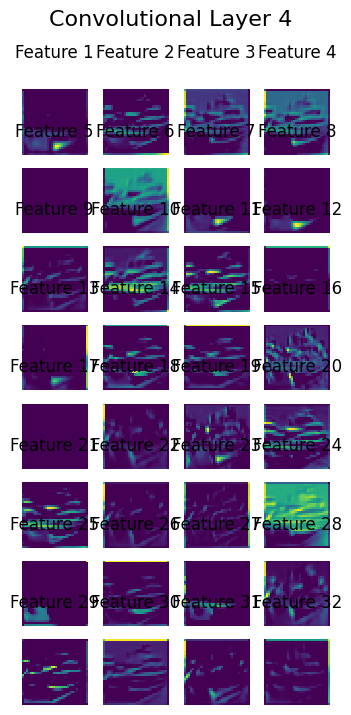

In [ ]:
#CIFAR (One-hot) Layers Plot

# Choose a sample input from the test set
sample_index = 1
sample_input = x_test[sample_index]

# Define a new model to visualize intermediate layers
visualization_model = Model(inputs=model.input, outputs=[conv1, conv2, conv3, conv4])

# Get the activations for the sample input
activations = visualization_model.predict(np.expand_dims(sample_input, axis=0))

# Visualize the feature maps learned by the convolutional layers
layer_names = ['Convolutional Layer 1', 'Convolutional Layer 2', 'Convolutional Layer 3', 'Convolutional Layer 4']
for i, layer_activation in enumerate(activations[::-1]):
    num_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    cols = num_features // 8
    rows = 8

    fig, axes = plt.subplots(rows, cols, figsize=(cols, rows))
    for j in range(rows):
        for k in range(cols):
            ax = axes[j, k]
            ax.matshow(layer_activation[0, :, :, j * cols + k], cmap='viridis')
            ax.axis('off')
            ax.set_title(f'Feature {j * cols + k + 1}')

    fig.suptitle(layer_names[i], fontsize=16)
    plt.show()

In [ ]:
y_test[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [ ]:
#CIFAR with dropout
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Dropout

# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoded vectors
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Create the CNN model with dropouts
input_layer = Input(shape=(32, 32, 3))
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
conv1 = Dropout(0.25)(conv1)  # Add dropout
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
flatten = Flatten()(conv4)
dense1 = Dense(64, activation='relu')(flatten)
dense1 = Dropout(0.5)(dense1)  # Add dropout
output_layer = Dense(10, activation='softmax')(dense1)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

# Rest of the code for visualization remains the same


Epoch 1/20
625/625 [==============================] - 20s 28ms/step - loss: 1.9286 - accuracy: 0.2851 - val_loss: 1.5533 - val_accuracy: 0.4328
Epoch 2/20
625/625 [==============================] - 17s 27ms/step - loss: 1.5997 - accuracy: 0.4108 - val_loss: 1.4538 - val_accuracy: 0.4548
Epoch 3/20
625/625 [==============================] - 17s 27ms/step - loss: 1.4742 - accuracy: 0.4610 - val_loss: 1.2498 - val_accuracy: 0.5452
Epoch 4/20
625/625 [==============================] - 17s 27ms/step - loss: 1.3541 - accuracy: 0.5081 - val_loss: 1.2260 - val_accuracy: 0.5543
Epoch 5/20
625/625 [==============================] - 16s 26ms/step - loss: 1.2631 - accuracy: 0.5401 - val_loss: 1.0860 - val_accuracy: 0.6117
Epoch 6/20
625/625 [==============================] - 17s 26ms/step - loss: 1.1773 - accuracy: 0.5720 - val_loss: 1.1471 - val_accuracy: 0.5861
Epoch 7/20
625/625 [==============================] - 16s 26ms/step - loss: 1.1081 - accuracy: 0.5942 - val_loss: 1.0831 - val_accuracy:

In [ ]:
model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)


Epoch 1/20
625/625 [==============================] - 17s 27ms/step - loss: 0.4777 - accuracy: 0.8116 - val_loss: 1.3439 - val_accuracy: 0.6671
Epoch 2/20
625/625 [==============================] - 16s 26ms/step - loss: 0.4684 - accuracy: 0.8198 - val_loss: 1.4878 - val_accuracy: 0.6576
Epoch 3/20
625/625 [==============================] - 16s 26ms/step - loss: 0.4472 - accuracy: 0.8281 - val_loss: 1.4999 - val_accuracy: 0.6637
Epoch 4/20
625/625 [==============================] - 17s 27ms/step - loss: 0.4398 - accuracy: 0.8332 - val_loss: 1.3364 - val_accuracy: 0.6626
Epoch 5/20
625/625 [==============================] - 16s 26ms/step - loss: 0.4108 - accuracy: 0.8428 - val_loss: 1.4016 - val_accuracy: 0.6620
Epoch 6/20
625/625 [==============================] - 16s 26ms/step - loss: 0.4132 - accuracy: 0.8412 - val_loss: 1.5832 - val_accuracy: 0.6634
Epoch 7/20
625/625 [==============================] - 16s 26ms/step - loss: 0.3913 - accuracy: 0.8503 - val_loss: 1.5502 - val_accuracy:

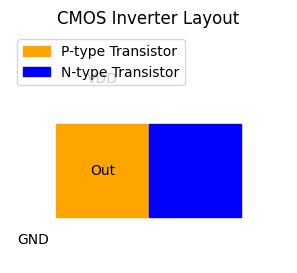

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a basic layout for a CMOS inverter with two transistors
def draw_cmos_layout():
    fig, ax = plt.subplots(figsize=(6, 3))

    # Draw P-type transistor
    p_rect = plt.Rectangle((1, 1), 2, 2, color='orange', label='P-type Transistor')
    ax.add_patch(p_rect)

    # Draw N-type transistor
    n_rect = plt.Rectangle((3, 1), 2, 2, color='blue', label='N-type Transistor')
    ax.add_patch(n_rect)

    # Add labels and annotations
    plt.text(2, 4, 'VDD', ha='center', va='center')
    plt.text(0.5, 0.5, 'GND', ha='center', va='center')
    plt.text(2, 2, 'Out', ha='center', va='center')

    plt.xlim(0, 6)
    plt.ylim(0, 5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axis('off')
    plt.legend(loc='upper left')

    plt.title('CMOS Inverter Layout')
    plt.show()

draw_cmos_layout()
